# Neural Networks

**Neural networks** are a type of *machine learning* model inspired by the structure and function of the human brain. They consist of interconnected **nodes**, or artificial neurons, that are organized into layers. These neurons process information and make predictions based on patterns in the input data.

Each neuron in a neural network receives input from other neurons, processes this input using a mathematical function, and then passes the result on to other neurons in the next layer. This allows neural networks to model complex, non-linear relationships between inputs and outputs, making them well-suited for tasks such as image and speech recognition, language translation, and decision-making.

The parameters of a neural network can be learned from data through a process called training, in which the network is presented with a large set of input-output examples and the parameters are adjusted so that the network's predictions are as close as possible to the true outputs. This process is typically done using optimization algorithms, such as stochastic gradient descent, to minimize a loss function that measures the difference between the network's predictions and the true outputs.

https://towardsdatascience.com/deep-learning-with-python-neural-networks-complete-tutorial-6b53c0b06af0

## Recurrent Neural Network (RNN)

A **Recurrent Neural Network (RNN)** is a type of artificial neural network that is designed to process sequential data, where each sample has connections to the previous sample in the sequence. RNNs have a "memory" that allows them to persist information from the past inputs, making them useful in processing sequences of variable length.

**Long Short-Term Memory (LSTM)** is a type of Recurrent Neural Network (RNN) that is specifically designed to avoid the *vanishing gradient problem* in traditional RNNs. LSTMs have a unique structure that allows them to selectively retain and forget information, effectively solving the issue of balancing short and long-term dependencies in sequential data. This makes them suitable for tasks like language modeling, speech recognition, and sequential decision-making. LSTMs are widely used in time series prediction tasks.

The *vanishing gradient problem* is a phenomenon that occurs in traditional Recurrent Neural Networks (RNNs) when training on long sequences. The issue is that the gradients, which are used to update the network parameters during training, can become very small or even zero as they are backpropagated through many time steps. This can make it difficult or even impossible for the network to learn long-term dependencies between elements in the sequence.

The vanishing gradient problem occurs because traditional RNNs use a simple activation function, such as the **sigmoid function**, that saturates and squashes the activation values into a small range. This means that the gradients passing through the activation function can become very small, making it challenging for the network to learn. The vanishing gradient problem becomes more severe as the depth of the network increases, making it difficult to train deep RNNs.

**ASIDE**: The sigmoid function is given by $$ S(x) = \frac{1}{1 + e^{-x}} $$

## Example - LSTM

https://github.com/nachi-hebbar/Time-Series-Forecasting-LSTM/blob/main/RNN_Youtube.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Visualisation

In [2]:
df = pd.read_csv('Data/Example_Data/monthly_milk_production.csv',index_col='Date',parse_dates=True)
df.index.freq='MS'

In [3]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


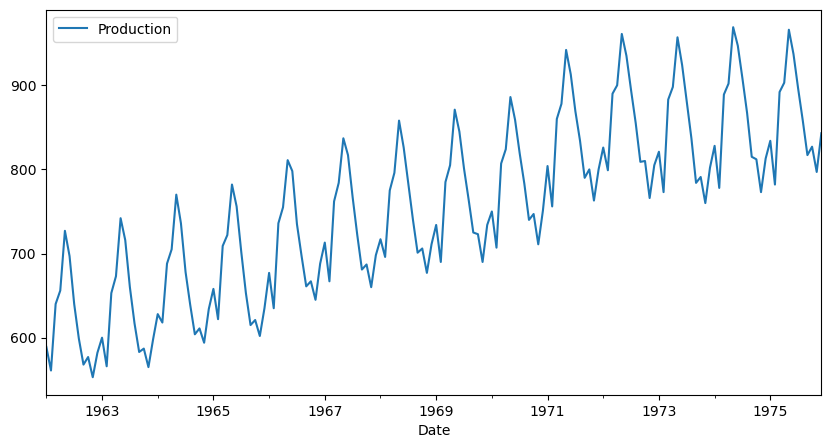

In [4]:
df.plot(figsize=(10,5));

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

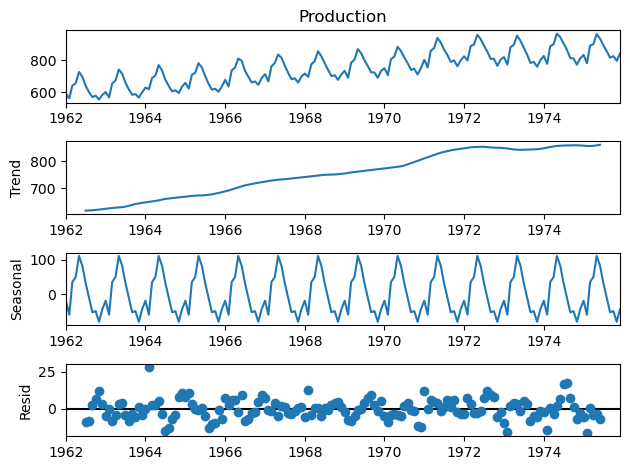

In [6]:
results = seasonal_decompose(df['Production'])
results.plot();

In [7]:
len(df)

168

## Data Preprocessing

In [8]:
train = df.iloc[:100]
test = df.iloc[100:]

In [9]:
len(train)

100

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# used to give data values between 0-1

In [11]:
df.head(),df.tail()

(            Production
 Date                  
 1962-01-01         589
 1962-02-01         561
 1962-03-01         640
 1962-04-01         656
 1962-05-01         727,
             Production
 Date                  
 1975-08-01         858
 1975-09-01         817
 1975-10-01         827
 1975-11-01         797
 1975-12-01         843)

In [12]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [13]:
scaled_train[:10]

array([[0.11320755],
       [0.02515723],
       [0.27358491],
       [0.32389937],
       [0.54716981],
       [0.45283019],
       [0.27358491],
       [0.14465409],
       [0.04716981],
       [0.0754717 ]])

In [14]:
from keras.preprocessing.sequence import TimeseriesGenerator

2023-02-07 10:13:47.784187: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
# define generator
n_input = 3 # number of months of data at a time
n_features = 1 # we are only using 1 timeseries to make our predictions
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [16]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.11320755 0.02515723 0.27358491]
Predict this y: 
 [[0.32389937]]


In [17]:
X.shape

(1, 3, 1)

In [18]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [20]:
# define model
model = Sequential() # adds layers in a sequence
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
# 100 neurons
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

2023-02-07 10:13:51.428463: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [22]:
# fit model
model.fit(generator,epochs=100)

Epoch 1/100
88/88 [==============================] - 2s 6ms/step - loss: 0.0561
Epoch 2/100
88/88 [==============================] - 0s 5ms/step - loss: 0.0307
Epoch 3/100
88/88 [==============================] - 1s 6ms/step - loss: 0.0266
Epoch 4/100
88/88 [==============================] - 0s 5ms/step - loss: 0.0144
Epoch 5/100
88/88 [==============================] - 1s 7ms/step - loss: 0.0112
Epoch 6/100
88/88 [==============================] - 1s 7ms/step - loss: 0.0125
Epoch 7/100
88/88 [==============================] - 1s 6ms/step - loss: 0.0109
Epoch 8/100
88/88 [==============================] - 1s 6ms/step - loss: 0.0075
Epoch 9/100
88/88 [==============================] - 1s 6ms/step - loss: 0.0062
Epoch 10/100
88/88 [==============================] - 1s 6ms/step - loss: 0.0084
Epoch 11/100
88/88 [==============================] - 0s 5ms/step - loss: 0.0058
Epoch 12/100
88/88 [==============================] - 0s 5ms/step - loss: 0.0086
Epoch 13/100
88/88 [=================

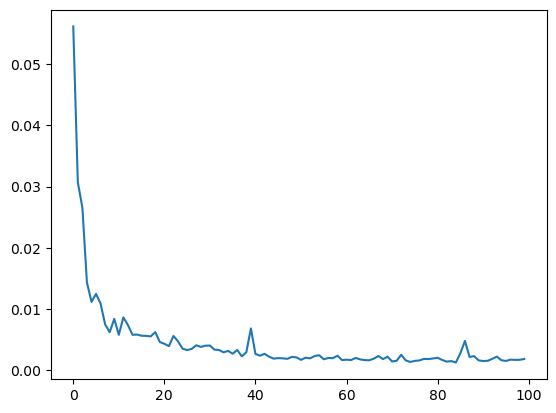

In [23]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [24]:
last_train_batch = scaled_train[-n_input:] 
# take the last n_input month of values, to make 
# predictions on the 1st test set

In [25]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [26]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 198ms/step


array([[1.0482258]], dtype=float32)

In [27]:
scaled_test[0]

array([1.04716981])

In [28]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 32ms/step


In [29]:
test_predictions
# NOTE: these predictions are in the range 0-1
# we need to convert it back 

[array([1.0482258], dtype=float32),
 array([0.97298855], dtype=float32),
 array([0.84547114], dtype=float32),
 array([0.7285308], dtype=float32),
 array([0.6122549], dtype=float32),
 array([0.59195775], dtype=float32),
 array([0.51331234], dtype=float32),
 array([0.6150375], dtype=float32),
 array([0.658736], dtype=float32),
 array([0.5735017], dtype=float32),
 array([0.8438067], dtype=float32),
 array([0.9097102], dtype=float32),
 array([1.0927154], dtype=float32),
 array([1.0236374], dtype=float32),
 array([0.90624374], dtype=float32),
 array([0.7896696], dtype=float32),
 array([0.6778561], dtype=float32),
 array([0.6461824], dtype=float32),
 array([0.58266544], dtype=float32),
 array([0.65995747], dtype=float32),
 array([0.6981044], dtype=float32),
 array([0.6496882], dtype=float32),
 array([0.8873262], dtype=float32),
 array([0.9623264], dtype=float32),
 array([1.1336194], dtype=float32),
 array([1.0704048], dtype=float32),
 array([0.96237123], dtype=float32),
 array([0.84701604], 

In [30]:
test.head()

,Production
Date,
1970-05-01,886
1970-06-01,859
1970-07-01,819
1970-08-01,783
1970-09-01,740


In [31]:
true_predictions = scaler.inverse_transform(test_predictions)

In [32]:
test['Predictions'] = true_predictions

/var/folders/42/2w7j46nn3j75crpy2kc1y7vw0000gn/T/ipykernel_1380/4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<AxesSubplot: xlabel='Date'>

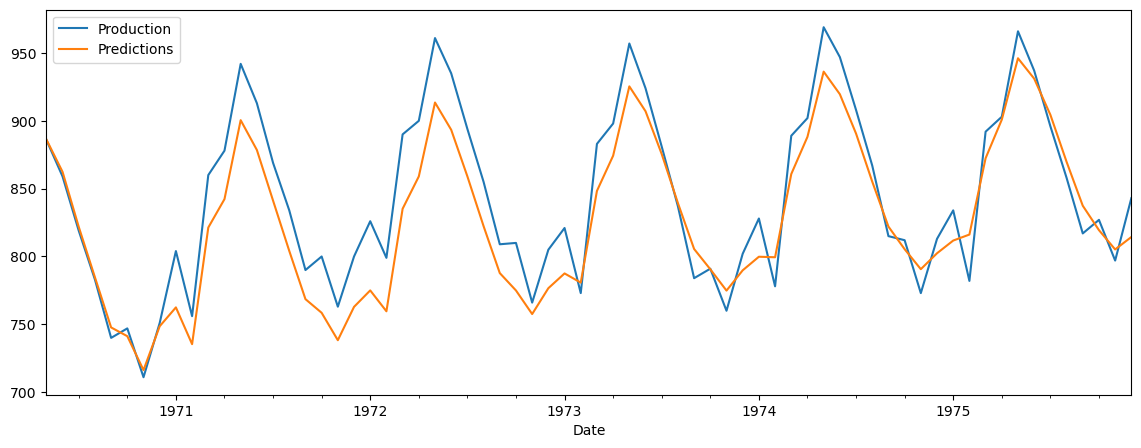

In [33]:
test.plot(figsize=(14,5));

In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

25.91463915942523
